# HW5: Machine Learning

Due: May 15, 11:59 PM.

## Please restart the kernel and run all before you submit ! (-1 Point if you forget to do it)

## Your name (-1 Point if you do not type your name here): Eric Chi

In [1]:
# import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

## Load dataset

This is a classification dataset. For more details on the features and labels, please check this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Run the following cell to load features (X) and labels (y).

In [2]:
from sklearn.datasets import load_breast_cancer

# read data
data = load_breast_cancer()
X = data.data
y = data.target


## Part 1: Train test split:

Use 80% of the data to train the model and 20% of the data to test.

In [3]:
#splitting the data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((455, 30), (114, 30))

**Question: Why do you need to do train_test split before your run dimension reduction algorithms?**

Answer: There are many reasons why we train_test split before we run our dimension reduction algorithms. One huge reason is to prevent data leakage. Data leakage being when information from outside our training dataset is used to create our model-- leading to optimistic performance estimates. By splitting the data first and then running dimension reduction algorithms such as PCA, we ensure that our test data does not influence the PCA transformation. This gives a more accurate and realistic estimate of our model's performance.

## Part 2: Dimension Reduction and visualization

Please implement PCA, kernel PCA and LLE for **training data samples**, and then visualize reduced training data samples in 2D-plane.

Requirements:

1. You should pick a good kernel/hyperparameter for kernel PCA, and number of neighborhoods for LLE. You do not need to show the process.

2. You should include all visualizations in one Figure using subplots. You should add x-label, y-label, legend, and title to make your plots clear. Moreover, you should include the used kernel/hyperparameters for kernel PCA visualization. Please see my sample plots below. Your plots can be different from my plots if parameters are different. But the layout (plot labels, lengends, and etc) should be similar.

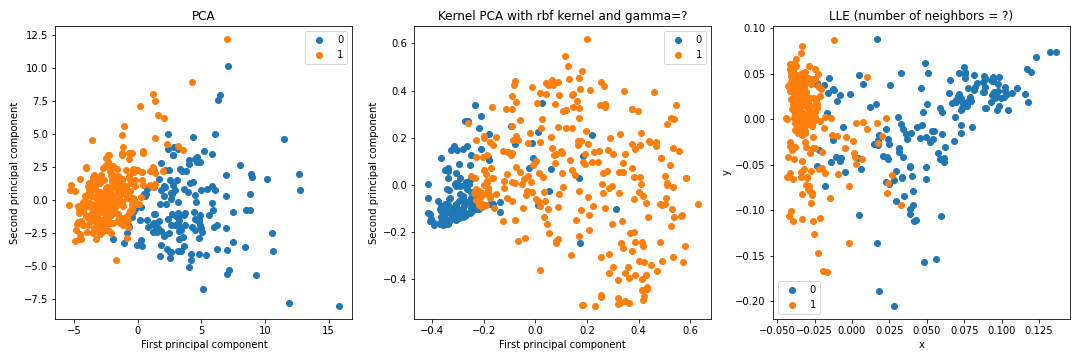

3. In-line comments are required to explain your codes.

Grading is based on the following:
1. You should implement each algorithm correctly. 
2. Comments are included. 
3. Visualization is clear and meets the requirements.





Text(0, 0.5, 'Second Principle Component')

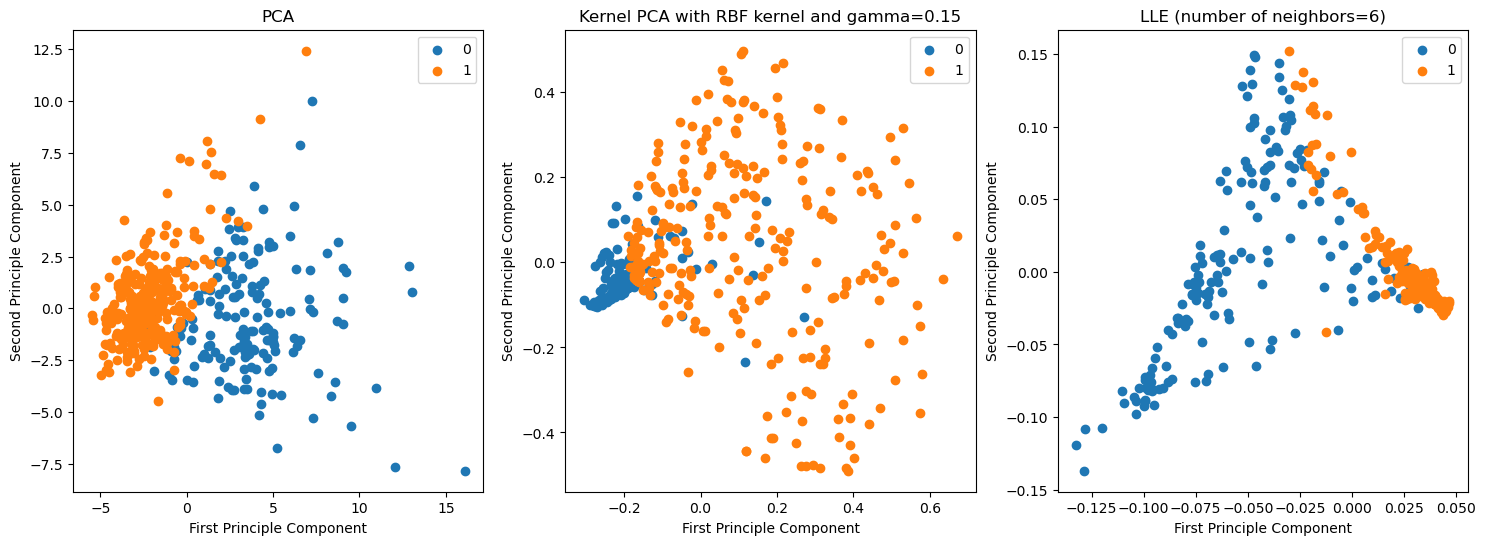

In [4]:
#Setting up plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
#Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
#plotting the data
axs[0].scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], label = '0')
axs[0].scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], label = '1')
axs[0].set_title('PCA')
axs[0].legend()
axs[0].set_xlabel('First Principle Component')
axs[0].set_ylabel('Second Principle Component')


#kernal PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.15)
X_train_kpca = kpca.fit_transform(X_train_scaled)
#plotting the data
axs[1].scatter(X_train_kpca[y_train == 0, 0], X_train_kpca[y_train == 0, 1], label = '0')
axs[1].scatter(X_train_kpca[y_train == 1, 0], X_train_kpca[y_train == 1, 1], label = '1')
axs[1].set_title('Kernel PCA with RBF kernel and gamma=0.15')
axs[1].legend()
axs[1].set_xlabel('First Principle Component')
axs[1].set_ylabel('Second Principle Component')


#LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=6)
X_train_lle = lle.fit_transform(X_train_scaled)
#plotting the data
axs[2].scatter(X_train_lle[y_train == 0, 0], X_train_lle[y_train == 0, 1], label = '0')
axs[2].scatter(X_train_lle[y_train == 1, 0], X_train_lle[y_train == 1, 1], label = '1')
axs[2].set_title('LLE (number of neighbors=6)')
axs[2].legend()
axs[2].set_xlabel('First Principle Component')
axs[2].set_ylabel('Second Principle Component')


## Part 3: Train classification models

In this part, you will train several models using **reduced training samples**.

* First of all, based on your visualization result in part 2, please determine which dimension reduction technique you want to use for part 3 and state the reason.

* Second, please do dimension reduction on training samples using the technique you select. (This step is the same as part 2, so you do not need to repeat the code, you can use what you obtain from part 2)

* Third, you should train k-nearest-neighbors, logistic regression, decision tree, random forest, and voting classifier models (use all models mention before) on reduced training samples and then report test accuracy.

* Last, show the decision region for each model. Please look at this reference [code](https://nbviewer.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/22-live-lecture.ipynb) and visualize the decision regions. You should write a function to draw decision region for any classification model and any data samples. Function docstring is required.

Please follow the following instructions and finish part 3. Inline comments are required for your code.

#### 3(a) Determine the dimension reduction technique you will use and state the reason

From the dimension reduction techniques I used in the previous part I have determined that PCA and Kernel PCA are both better than LLE for the given data. This may however be due to the n_nearest neighbor value I used in my algorithm. Between the two PCA, PCA is better as from the graphs we see a better seperation of data. Also, unlike Kernel PCA, with PCA we do not have to worry about overfitting of any data which makes it more reliable. In data sets in which PCA seems to be a good option, it is very effective. We find that kernel PCA is really good at non-linearly seperated data and LLE is the best when the important factors in the data variation are due to underlying manifold structures. I found PCA to be a good dimension reduction tool for this specific data set.

#### 3(b) Do dimension reduction

You can repeat part 2 or use results from part 2

In [5]:
#Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Basically the same thing as part 2, just scaled X_test and fit it with pca as well.

#### 3(c) Write a function to draw decision region

Your function looks similar as the function in the sample codes, but you should modify the code because it only works for penguin data.

Docsting and inline comments are required.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def draw_decision_regions(classifier, X, y, resolution=0.02):
    """
    Plot the decision regions for a classifier.

    Parameters:
    classifier (object): The trained classifier object.
    X (array-like): The input features.
    y (array-like): The target labels.
    resolution (float, optional): The step size of the meshgrid. Default is 0.02.

    Returns:
    None
    """

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label= f'Class {cl}', edgecolors= 'black')



#### 3(d) Train k-nearest-neighbors model

You should try different k's and select the best one. You can either use cross-validation or train models using different k manually.

Print the test accuracy for all models, and draw the decision region for the model with the best k.

K=1 accuracy: 0.9649122807017544
K=3 accuracy: 0.9736842105263158
K=5 accuracy: 0.9736842105263158
K=7 accuracy: 0.9649122807017544
K=9 accuracy: 0.9649122807017544
K=11 accuracy: 0.9736842105263158
K=13 accuracy: 0.9736842105263158
K=15 accuracy: 0.9736842105263158
K=17 accuracy: 0.9736842105263158
K=19 accuracy: 0.9649122807017544
Best K: 3


/var/folders/rt/vlxzyc6d2mggxf0fjtgxlls80000gn/T/ipykernel_141/644518779.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label= f'Class {cl}', edgecolors= 'black')


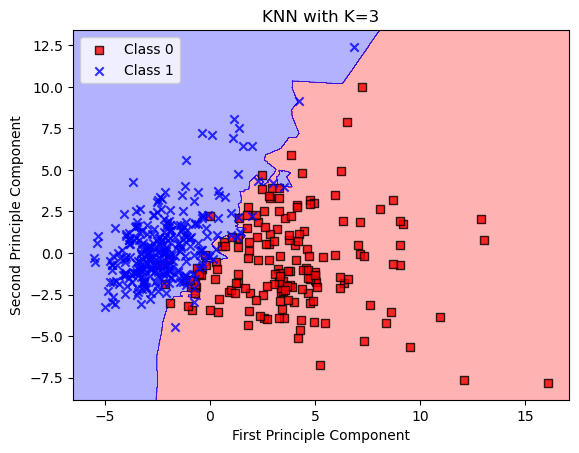

In [7]:
#Different K-values and a place to score their accuracy
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuracies = []

#cycling through the K-values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)

    #calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'K={k} accuracy: {accuracy}')

#Determine the best 'k' value based on the accuracy scores.
best_k = k_values[accuracies.index(max(accuracies))]
print (f'Best K: {best_k}')

#Plotting the decision regions for the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_pca, y_train)
draw_decision_regions(knn_best, X_train_pca, y_train)
plt.title(f'KNN with K={best_k}')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.legend(loc='upper left')



#### 3(e) Train logistic regression model

No hyperparameter selection needed. 

Print the test accuracy, and draw the decision region.

Logistic Regression accuracy: 0.9912280701754386


/var/folders/rt/vlxzyc6d2mggxf0fjtgxlls80000gn/T/ipykernel_141/644518779.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label= f'Class {cl}', edgecolors= 'black')


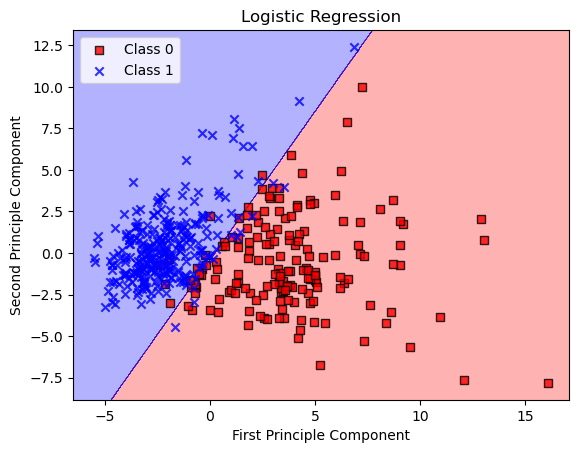

In [8]:
#Initializing and training logistic regression model
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

#Predicting using the PCA transformed test data
y_pred = lr.predict(X_test_pca)

#Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression accuracy: {accuracy}')

#Plotting the decision regions for the logistic regression model
draw_decision_regions(lr, X_train_pca, y_train)
plt.title('Logistic Regression')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.legend(loc='upper left')
plt.show()

#### 3(f) Train decision tree

You should try different `max_depth` and select the best one.

Print the test accuracy for all models, and draw the decision region with the best `max_depth`.

Max Depth=1 accuracy: 0.9912280701754386
Max Depth=2 accuracy: 0.9912280701754386
Max Depth=3 accuracy: 0.9912280701754386
Max Depth=4 accuracy: 0.9912280701754386
Max Depth=5 accuracy: 0.9912280701754386
Max Depth=6 accuracy: 0.9912280701754386
Max Depth=7 accuracy: 0.9912280701754386
Max Depth=8 accuracy: 0.9912280701754386
Max Depth=9 accuracy: 0.9912280701754386
Max Depth=10 accuracy: 0.9912280701754386
Best Max Depth: 5


/var/folders/rt/vlxzyc6d2mggxf0fjtgxlls80000gn/T/ipykernel_141/644518779.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label= f'Class {cl}', edgecolors= 'black')


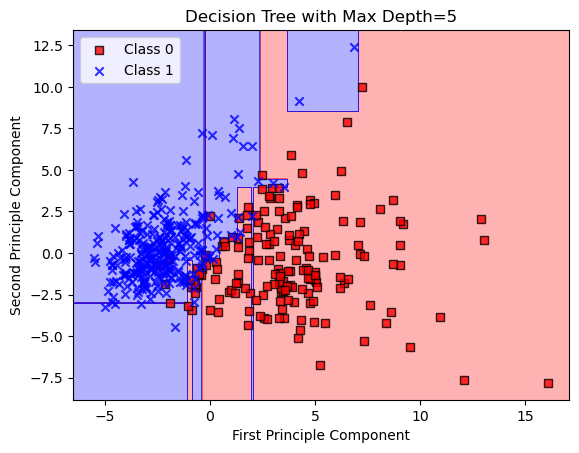

In [9]:
#### Your code here
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scores_dt = []

for depth in max_depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train_pca, y_train)
    y_pred_dt = dt.predict(X_test_pca)
    score_dt = accuracy_score(y_test, y_pred_dt)
    scores_dt.append(score_dt)
    print(f'Max Depth={depth} accuracy: {accuracy}')

best_depth = max_depth_values[scores_dt.index(max(scores_dt))]
print(f'Best Max Depth: {best_depth}')

#using best depth to plot decision regions
dt_best = DecisionTreeClassifier(max_depth=best_depth)
dt_best.fit(X_train_pca, y_train)

draw_decision_regions(dt_best, X_train_pca, y_train)
plt.title(f'Decision Tree with Max Depth={best_depth}')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.legend(loc='upper left')
plt.show()

#### 3(g) Train random forest

You should try different `max_depth` and `n_estimators`, then select the best hyperparameters.

Print the test accuracy for all models, and draw the decision region of the model with selected `max_depth` and `n_estimators`.

Max Depth=1, n_estimators=10 accuracy: 0.7456140350877193
Max Depth=1, n_estimators=50 accuracy: 0.9473684210526315
Max Depth=1, n_estimators=100 accuracy: 0.9473684210526315
Max Depth=1, n_estimators=200 accuracy: 0.9473684210526315
Max Depth=1, n_estimators=300 accuracy: 0.9473684210526315
Max Depth=3, n_estimators=10 accuracy: 0.9649122807017544
Max Depth=3, n_estimators=50 accuracy: 0.9649122807017544
Max Depth=3, n_estimators=100 accuracy: 0.9736842105263158
Max Depth=3, n_estimators=200 accuracy: 0.9824561403508771
Max Depth=3, n_estimators=300 accuracy: 0.9736842105263158
Max Depth=5, n_estimators=10 accuracy: 0.9824561403508771
Max Depth=5, n_estimators=50 accuracy: 0.9824561403508771
Max Depth=5, n_estimators=100 accuracy: 0.9824561403508771
Max Depth=5, n_estimators=200 accuracy: 0.9824561403508771
Max Depth=5, n_estimators=300 accuracy: 0.9824561403508771
Max Depth=7, n_estimators=10 accuracy: 0.9824561403508771
Max Depth=7, n_estimators=50 accuracy: 0.9912280701754386
Max D

/var/folders/rt/vlxzyc6d2mggxf0fjtgxlls80000gn/T/ipykernel_141/644518779.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label= f'Class {cl}', edgecolors= 'black')


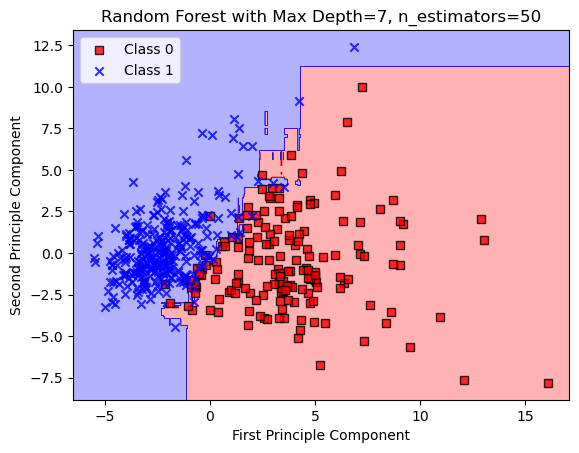

In [10]:
#### Your code here

#different combinations of max_depth and n_estimators
max_depth_values = [1, 3, 5, 7, 9, 11]
n_estimators_values = [10, 50, 100, 200, 300]
scores_rf = []
best_score = 0
best_hyperparameters = (0, 0)

for depth in max_depth_values:
    for n in n_estimators_values:
        rf = RandomForestClassifier(n_estimators=n, max_depth=depth)
        rf.fit(X_train_pca, y_train)
        y_pred_rf = rf.predict(X_test_pca)
        score_rf = accuracy_score(y_test, y_pred_rf)
        scores_rf.append(score_rf)
        print(f'Max Depth={depth}, n_estimators={n} accuracy: {score_rf}')
        if score_rf > best_score:
            best_score = score_rf
            best_hyperparameters = (depth, n)

print(f'Best Max Depth and n_estimators: {best_hyperparameters}, best accuracy: {best_score}')

#using best hyperparameters to plot decision regions
rf_best = RandomForestClassifier(max_depth=best_hyperparameters[0], n_estimators=best_hyperparameters[1])
rf_best.fit(X_train_pca, y_train)

draw_decision_regions(rf_best, X_train_pca, y_train)
plt.title(f'Random Forest with Max Depth={best_hyperparameters[0]}, n_estimators={best_hyperparameters[1]}')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.legend(loc='upper left')
plt.show()



#### 3(h) Train max voting classifier

You should use the hyperparameters you select before. 

Print the test accuracy, and draw the decision region.

Voting Classifier accuracy: 0.9912280701754386


/var/folders/rt/vlxzyc6d2mggxf0fjtgxlls80000gn/T/ipykernel_141/644518779.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label= f'Class {cl}', edgecolors= 'black')


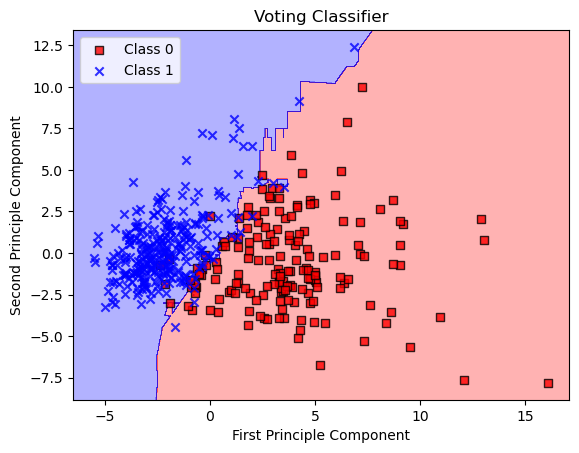

In [11]:
#### Your code here
knn_best = KNeighborsClassifier(n_neighbors=best_k)
lr = LogisticRegression()
dt_best = DecisionTreeClassifier(max_depth=best_depth)
rf_best = RandomForestClassifier(max_depth=best_hyperparameters[0], n_estimators=best_hyperparameters[1])

#Voting Classifier
vc = VotingClassifier(estimators=[('knn', knn_best), ('lr', lr), ('dt', dt_best), ('rf', rf_best)], voting='hard')
vc.fit(X_train_pca, y_train)
y_pred_vc = vc.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_vc)
print(f'Voting Classifier accuracy: {accuracy}')

#Plotting the decision regions for the voting classifier
draw_decision_regions(vc, X_train_pca, y_train)
plt.title('Voting Classifier')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.legend(loc='upper left')
plt.show()
